In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(0)                    #to make a fixed generation, works similar to the 'random_state'

#importing necessary files

In [ ]:

# Unpickle the file
with open(r'/content/drive/MyDrive/RGB Weather/images.p', "rb") as f:
  images = pickle.load(f)

with open(r'/content/drive/MyDrive/RGB Weather/labels.p', "rb") as f:
  labels = pickle.load(f)

#'rb' mode is for reading; 'pickle.load()' is used to load the pickle files

In [ ]:
print(images.shape)
print(labels.shape)

#getting the shapes of 'images' and 'labels' pickled files

(6860, 128, 128, 3)
(6860,)


In [ ]:
set(labels)

#getting the unique entries in 'labels'

{'dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

#label encoding all the labels in 'label' np-array

In [ ]:
set(labels)

#unique entries in 'labels'

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

[698, 850, 475, 639, 591, 377, 526, 232, 1160, 692, 620]


Text(0.5, 1.0, 'Distribution of the Training Dataset')

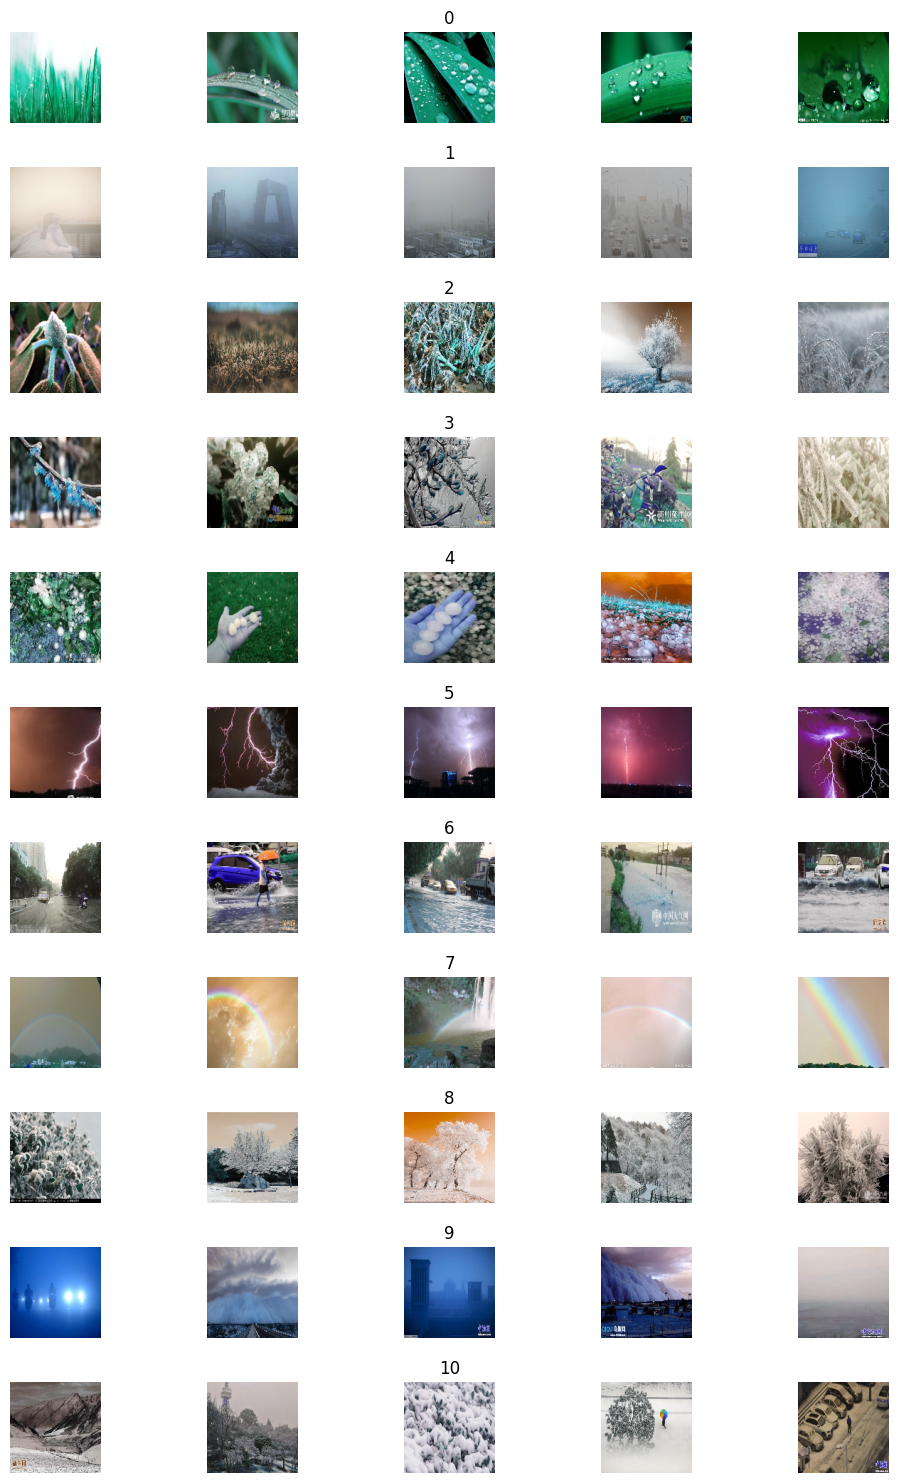

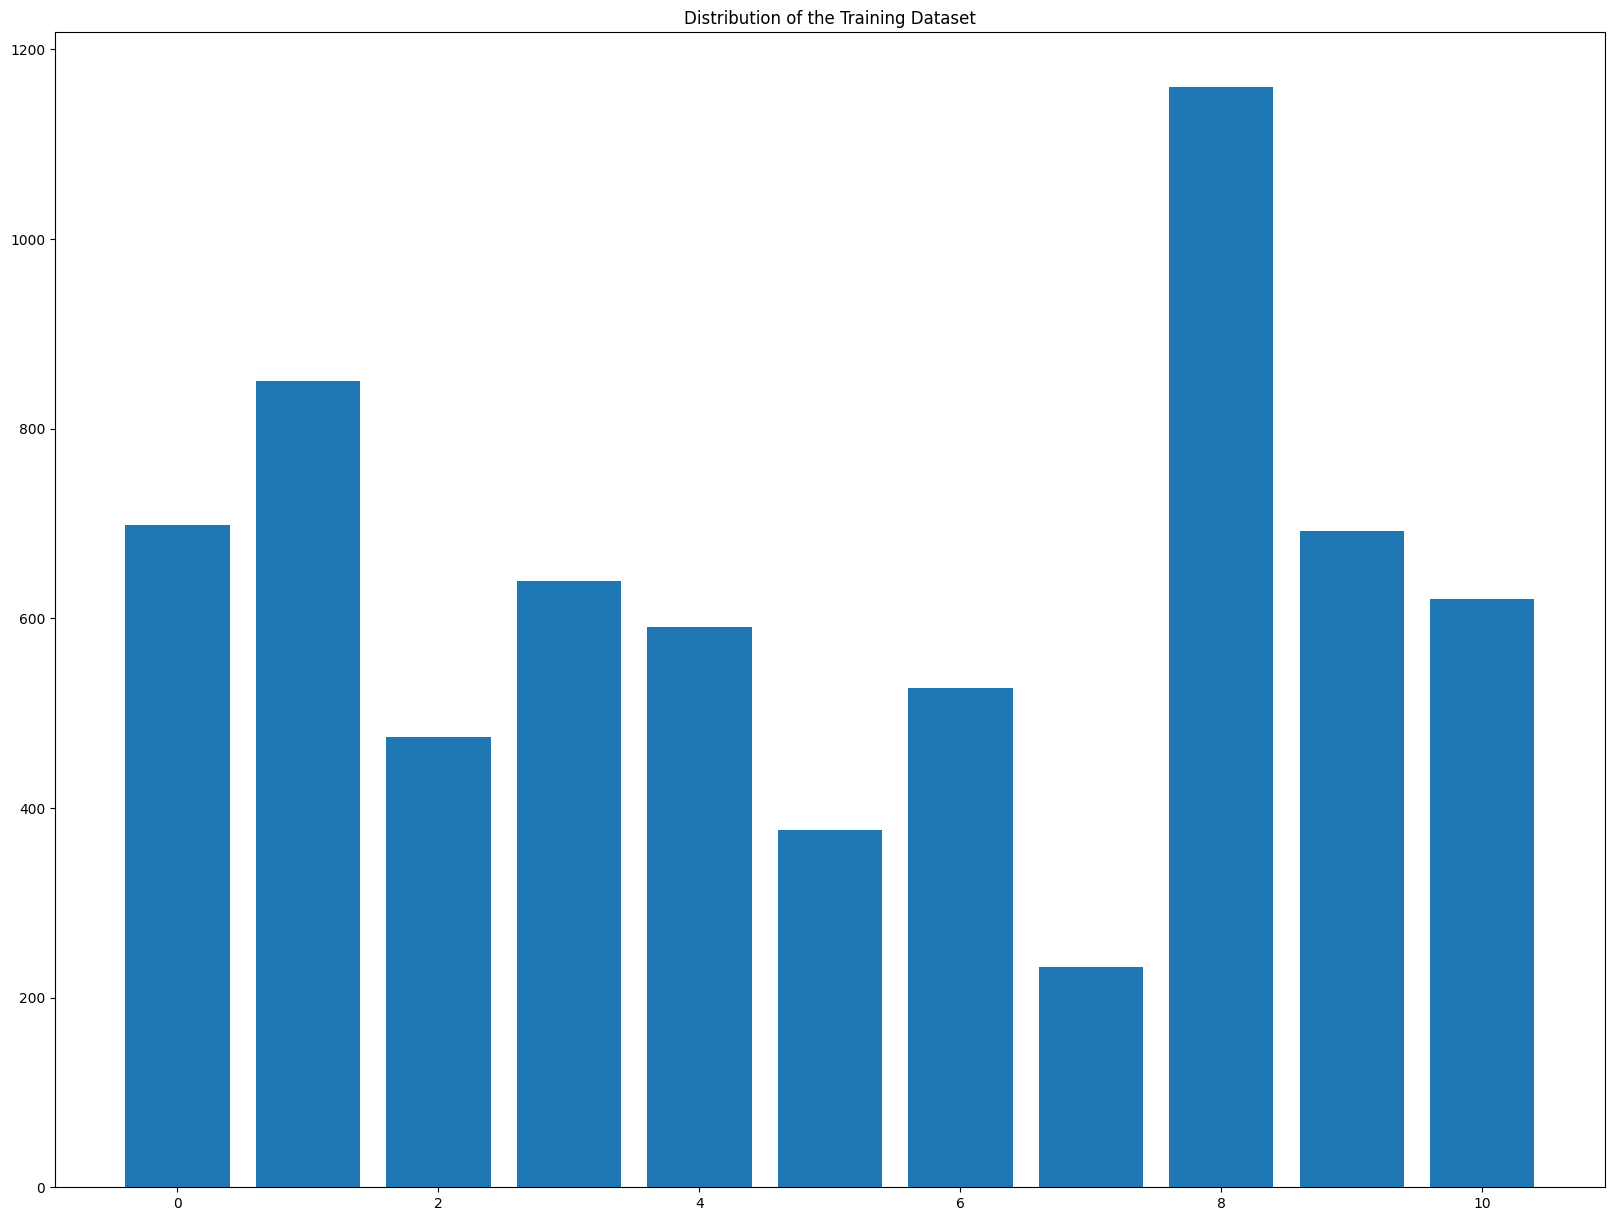

In [ ]:
num_of_samples = []

cols = 5
num_classes = 11

fig, axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(10,15))
#'nrows' number of subplot rows, 'ncols' number of subplot columns, then the figure size
fig.tight_layout()              #so that no overlapping would occur

for i in range(cols):                  #for number of displayed columns
  for j in range(num_classes):         #for each data from 0 to 10
    x_selected = images[labels==j]           #for the the data of 'xtr' at the 'j' label of 'ytr'
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1))],cmap = plt.get_cmap('Blues'))
    #'x_selected-1' for the maximum index of that number stored in 'xtr'
    axs[j][i].axis('off')
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(20,15))
plt.bar(range(0,num_classes),num_of_samples)
plt.title('Distribution of the Training Dataset')

In [ ]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

#getting to know about all the label encoded values

array(['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain',
       'rainbow', 'rime', 'sandstorm', 'snow'], dtype='<U9')

In [ ]:
n_weather = len(set(labels))
print("Number of stored Weather: ", n_weather)
label_mapping = le.inverse_transform(np.arange(n_weather))
for i in range(len(label_mapping)):
  print(i, "--->", label_mapping[i])

#mapping each encoded variable

Number of stored Weather:  11
0 ---> dew
1 ---> fogsmog
2 ---> frost
3 ---> glaze
4 ---> hail
5 ---> lightning
6 ---> rain
7 ---> rainbow
8 ---> rime
9 ---> sandstorm
10 ---> snow


In [ ]:
import cv2           #importing cv2 library for image preprocessing

In [ ]:
def preprocessing(img):                         #preprocessing function
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)       #color conversion from BGR to RGB
  img = cv2.resize(img, (128, 128))             #declaring the pixel size of the image as 128 by 128 pixels
  img = img.reshape(128, 128, 3)                #declaring the shape of the image as (pixels size, number of channels)
  img = img/255                                 #normalization-> bringing all pixel values between 0 and 1
  return img

In [ ]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

#preprocessing each image, mapping them, converting them to list and finally storing them as an array inside 'images' variable

Shape of Input:  (6860, 128, 128, 3)


In [ ]:
print(images)

[[[[0.29803922 0.46666667 0.00392157]
   [0.29019608 0.45882353 0.        ]
   [0.29411765 0.4627451  0.        ]
   ...
   [0.18823529 0.41176471 0.00784314]
   [0.18431373 0.40784314 0.00392157]
   [0.18823529 0.41176471 0.00784314]]

  [[0.30588235 0.46666667 0.00392157]
   [0.29411765 0.4627451  0.        ]
   [0.30196078 0.45882353 0.00784314]
   ...
   [0.18823529 0.40392157 0.00392157]
   [0.18431373 0.40392157 0.00784314]
   [0.19215686 0.40392157 0.00784314]]

  [[0.29411765 0.4627451  0.00392157]
   [0.29019608 0.45882353 0.        ]
   [0.30196078 0.47058824 0.00784314]
   ...
   [0.18823529 0.40392157 0.00392157]
   [0.18431373 0.4        0.00392157]
   [0.18431373 0.4        0.        ]]

  ...

  [[0.05098039 0.2        0.        ]
   [0.05098039 0.2        0.        ]
   [0.04705882 0.19607843 0.        ]
   ...
   [0.19215686 0.42352941 0.        ]
   [0.21960784 0.45098039 0.        ]
   [0.22745098 0.45882353 0.00392157]]

  [[0.05098039 0.2        0.00784314]
   [0.0

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels = to_categorical(labels)
print(labels)

#converting each encoded value of the 'labels' to catergories

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
categories = labels.shape[1]
print(categories)

11


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# import convolution layer
from tensorflow.keras.layers import Conv2D

# import pooling layer
from tensorflow.keras.layers import MaxPooling2D

# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
def modified_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(100, activation='relu'))

  model.add(Dense(11, activation='softmax'))

  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
model=modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
h=model.fit(images,labels,batch_size=80,epochs=35,validation_data=(images,labels),shuffle='True',verbose=1)

Epoch 1/35
86/86 [==============================] - 22s 109ms/step - loss: 1.5413 - accuracy: 0.4751 - val_loss: 1.0942 - val_accuracy: 0.6241
Epoch 2/35
86/86 [==============================] - 5s 56ms/step - loss: 1.0472 - accuracy: 0.6414 - val_loss: 0.8948 - val_accuracy: 0.7047
Epoch 3/35
86/86 [==============================] - 5s 64ms/step - loss: 0.9102 - accuracy: 0.6913 - val_loss: 0.7695 - val_accuracy: 0.7448
Epoch 4/35
86/86 [==============================] - 5s 56ms/step - loss: 0.7975 - accuracy: 0.7286 - val_loss: 0.7306 - val_accuracy: 0.7499
Epoch 5/35
86/86 [==============================] - 6s 70ms/step - loss: 0.6630 - accuracy: 0.7730 - val_loss: 0.4910 - val_accuracy: 0.8439
Epoch 6/35
86/86 [==============================] - 5s 57ms/step - loss: 0.5200 - accuracy: 0.8252 - val_loss: 0.4907 - val_accuracy: 0.8417
Epoch 7/35
86/86 [==============================] - 5s 56ms/step - loss: 0.4027 - accuracy: 0.8662 - val_loss: 0.3164 - val_accuracy: 0.8975
Epoch 8/35


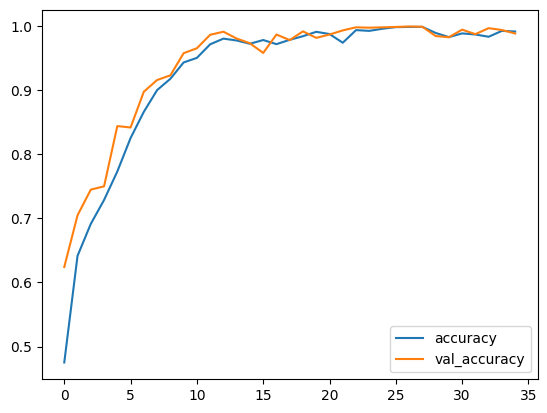

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

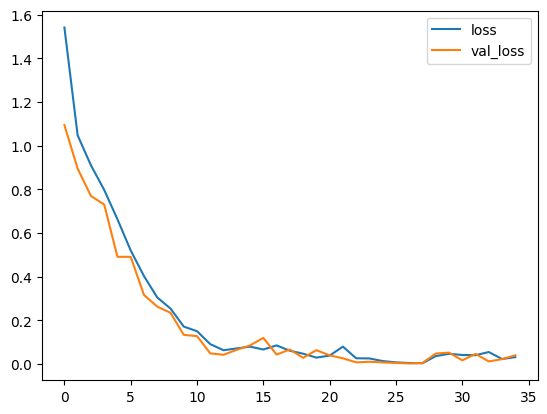

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
#loading image for prediciton
from google.colab import files
upload=files.upload()

Saving Jaanu_13.jpg to Jaanu_13.jpg


In [ ]:
d=list(upload.keys())[0]

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128, 128))
img = img.reshape(128, 128, 3)
img = img/255
print(img.shape)
#preprocessing the image

(128, 128, 3)


<ipython-input-31-f61633408b6a>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


In [ ]:
#names of all the layers on CNN

layer_names = [layer.output for layer in model.layers]
print(layer_names)

[<KerasTensor: shape=(None, 126, 126, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 63, 63, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 61, 61, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 30, 30, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 14, 14, 128) dtype=float32 (created by layer 'max_pooling2d_2')>, <KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>, <KerasTensor: shape=(None, 400) dtype=float32 (created by layer 'dense')>, <KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'dense_1')>, <KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense_2')>, <KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'dense_3')>, <KerasTensor: shape=(None, 11) dtype=float32 (created by layer 'dense_4')>]


In [ ]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,128,128,3))

1/1 [==============================] - 0s 81ms/step


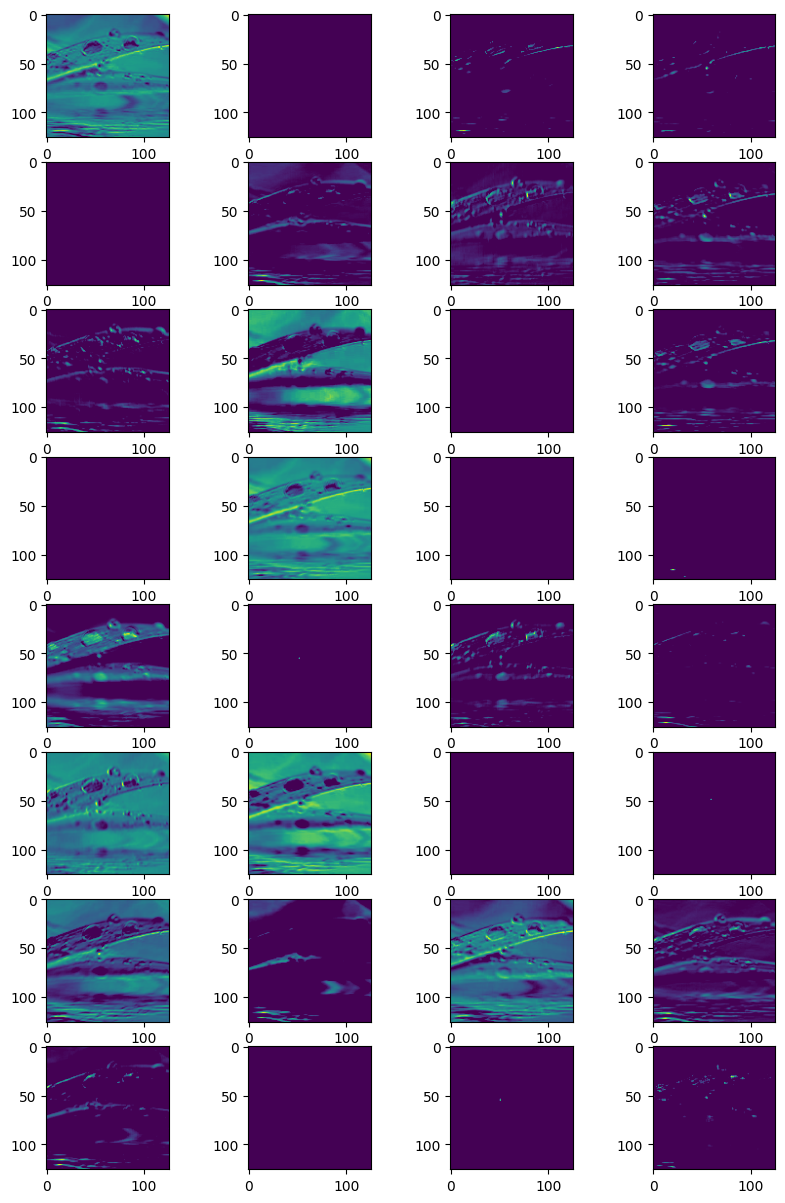

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [ ]:
from google.colab import files
upload=files.upload()

In [ ]:
d=list(upload.keys())[0]

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=np.asarray(img)
img=cv2.resize(img,(128,128))
img=preprocessing(img)



In [ ]:
img=img.reshape(1,128,128,3)
print(model.predict(img))

In [ ]:
prediction=model.predict(img)

In [ ]:
p=np.argmax(prediction,axis=1)
p